In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Setting  visual style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 6]

# Creating output directory for images
if not os.path.exists('outputs'):
    os.makedirs('outputs')

In [6]:
#Loading datasets
hist_df= pd.read_csv("historical_data.csv")
sentiment_df= pd.read_csv("fear_greed_index.csv")
hist_df.head(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [8]:
sentiment_df.head(5)

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [13]:
#Checking for missing values
print("--- Missing Values by Column ---")
print(hist_df.isnull().sum())

--- Missing Values by Column ---
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
datetime            0
date                0
dtype: int64


In [14]:
sentiment_df.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0


In [17]:
#converting timestamp
hist_df['datetime'] = pd.to_datetime(hist_df['Timestamp'], unit='ms')
hist_df['date'] = hist_df['datetime'].dt.date
print(f"Data Range: {hist_df['date'].min()} to {hist_df['date'].max()}")

Data Range: 2023-03-28 to 2025-06-15


In [21]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], format='mixed', dayfirst=True).dt.date
sentiment_df.rename(columns={'classification': 'sentiment'}, inplace=True)
sentiment_df = sentiment_df[['date', 'sentiment']]


In [22]:
sentiment_df.head(5)

,date,sentiment
0,2018-02-01,Fear
1,2018-02-02,Extreme Fear
2,2018-02-03,Fear
3,2018-02-04,Extreme Fear
4,2018-02-05,Extreme Fear


In [28]:
#Aggregating and merging datasets

daily_stats = hist_df.groupby('date').agg({
    'Closed PnL': 'sum',
    'Size USD': ['sum', 'mean'],
    'Account': 'count'
}).reset_index()
daily_stats.columns = ['date', 'total_pnl', 'total_volume', 'avg_position_size', 'trade_count']
merged_df = pd.merge(daily_stats, sentiment_df, on='date', how='inner')

print(f" Merge Complete. Total Overlapping Days: {len(merged_df)}")
print("\n--- First 6 Rows of Merged Data ---")
print(merged_df.head(6))

#Saving the dataset
merged_df.to_csv('merged_daily_data.csv', index=False)
print("\n Saved 'merged_daily_data.csv' successfully.")


 Merge Complete. Total Overlapping Days: 6

--- First 6 Rows of Merged Data ---
         date     total_pnl  total_volume  avg_position_size  trade_count  \
0  2023-03-28  0.000000e+00  4.770000e+02         159.000000            3   
1  2023-11-14  1.555034e+02  1.155543e+07       11057.827522         1045   
2  2024-03-09  1.769655e+05  3.940677e+07        5660.265764         6962   
3  2024-07-03  1.587424e+05  2.184323e+07        3058.848110         7141   
4  2024-10-27  3.189461e+06  1.039478e+08        2949.625864        35241   
5  2025-02-19  6.699925e+06  7.041585e+08        5259.977837       133871   

       sentiment  
0          Greed  
1          Greed  
2  Extreme Greed  
3        Neutral  
4          Greed  
5           Fear  

 Saved 'merged_daily_data.csv' successfully.


/tmp/ipython-input-3917248319.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


 Saved plot: outputs/pnl_by_sentiment.png


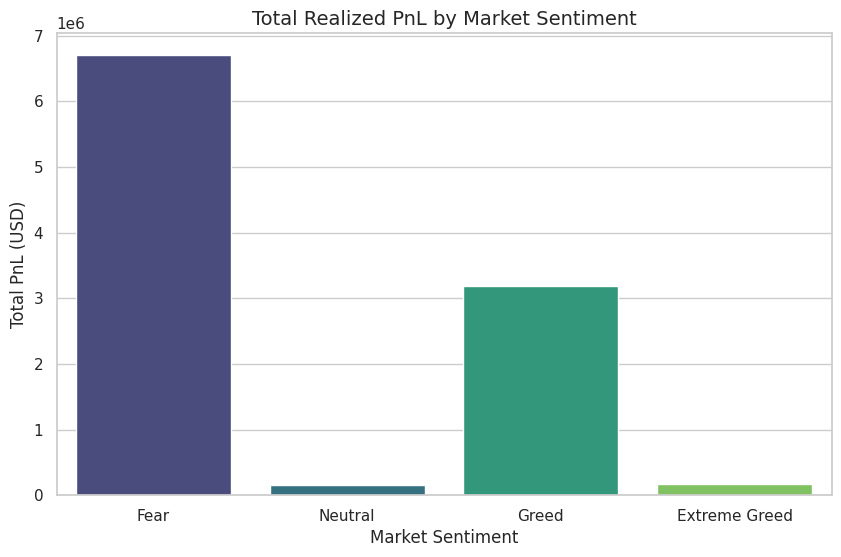

/tmp/ipython-input-3917248319.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


 Saved plot: outputs/volume_by_sentiment.png


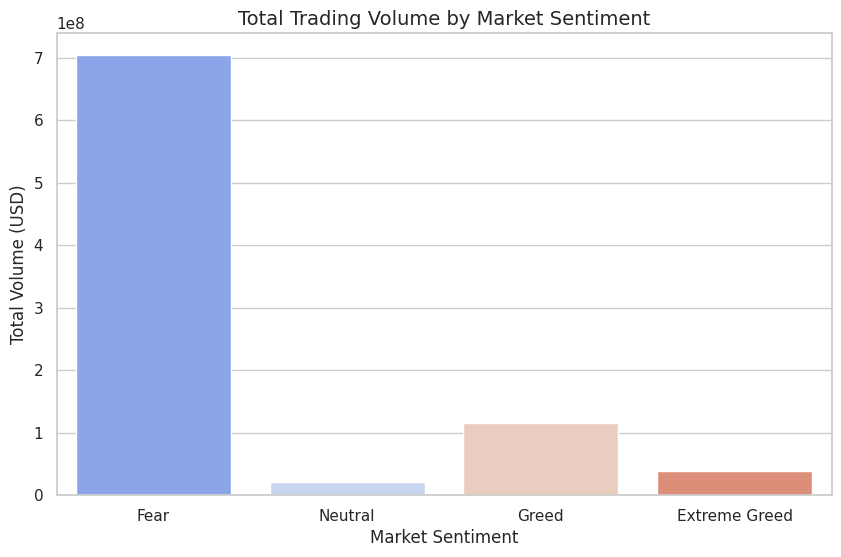

/tmp/ipython-input-3917248319.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Saved plot: outputs/risk_by_sentiment.png


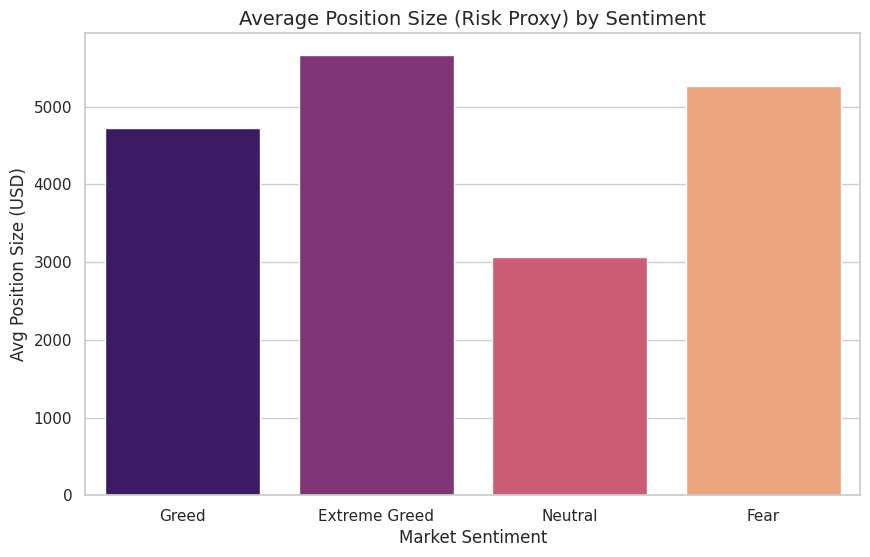

In [29]:
# --- STEP 5: Visualization ---
# 1. Create an 'outputs' folder to keep things organized
if not os.path.exists('outputs'):
    os.makedirs('outputs')

# Set the visual style for the charts
sns.set(style="whitegrid")

# Function to create and save plots consistently
def create_plot(y_col, title, ylabel, filename, color_palette):
    plt.figure(figsize=(10, 6))


    order_list = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']

    existing_order = [o for o in order_list if o in merged_df['sentiment'].unique()]

    # Create the Bar Plot
    sns.barplot(
        x='sentiment',
        y=y_col,
        data=merged_df,
        estimator='sum',
        errorbar=None,
        order=existing_order,
        palette=color_palette
    )

    plt.title(title, fontsize=14)
    plt.ylabel(ylabel, fontsize=12)
    plt.xlabel('Market Sentiment', fontsize=12)

    # Save the plot
    save_path = f'outputs/{filename}'
    plt.savefig(save_path)
    print(f" Saved plot: {save_path}")
    plt.show()

# --- Generating the Charts ---

# 1. Profitability Analysis (PnL)
create_plot(
    y_col='total_pnl',
    title='Total Realized PnL by Market Sentiment',
    ylabel='Total PnL (USD)',
    filename='pnl_by_sentiment.png',
    color_palette='viridis'
)

# 2. Volume Analysis
create_plot(
    y_col='total_volume',
    title='Total Trading Volume by Market Sentiment',
    ylabel='Total Volume (USD)',
    filename='volume_by_sentiment.png',
    color_palette='coolwarm'
)

# 3. Risk Analysis (Using Position Size as Proxy)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='sentiment',
    y='avg_position_size',
    data=merged_df,
    estimator='mean',  # Use MEAN for risk proxy
    errorbar=None,
    palette='magma'
)
plt.title('Average Position Size (Risk Proxy) by Sentiment', fontsize=14)
plt.ylabel('Avg Position Size (USD)', fontsize=12)
plt.xlabel('Market Sentiment')
plt.savefig('outputs/risk_by_sentiment.png')
print("Saved plot: outputs/risk_by_sentiment.png")
plt.show()

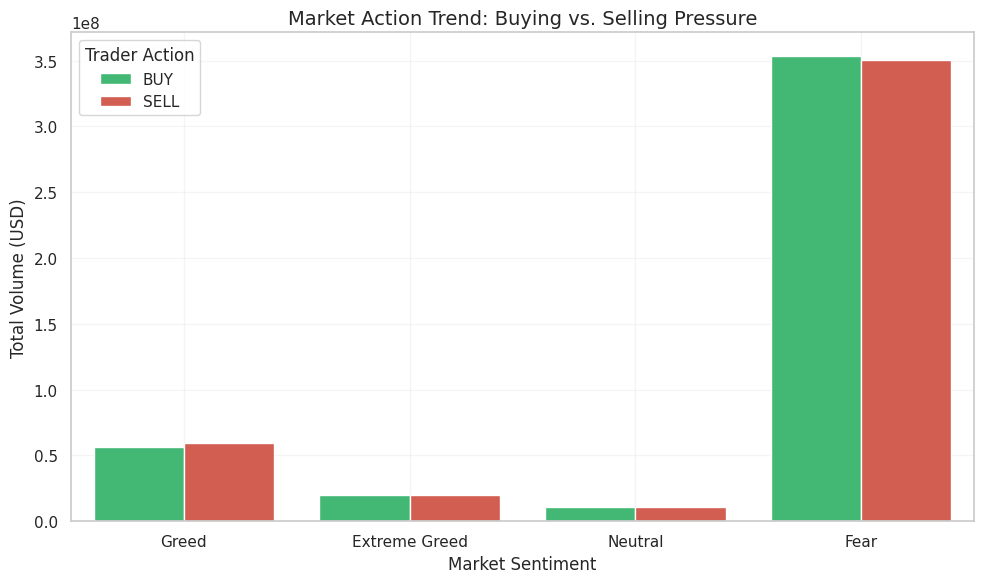


--- Buy/Sell Trends by Sentiment ---
Side           Buy %  Sell %
sentiment                   
Extreme Greed  49.68   50.32
Fear           50.24   49.76
Greed          48.61   51.39
Neutral        49.92   50.08


In [31]:
#Analyzing Buy VS Sell
# 2. Preprocess & Merge
# Ensure we have the 'Side' column standardized
hist_df['Side'] = hist_df['Side'].astype(str).str.upper()

# Group by Date and Side to get daily volume for Buys vs Sells
daily_side = hist_df.groupby(['date', 'Side'])['Size USD'].sum().reset_index()

# Merge with Sentiment
merged_action = pd.merge(daily_side, sentiment_df[['date', 'sentiment']], on='date', how='inner')

# 3. Plotting the Trend
plt.figure(figsize=(10, 6))
sns.barplot(
    x='sentiment',
    y='Size USD',
    hue='Side',
    data=merged_action,
    estimator='sum',
    errorbar=None,
    palette={'BUY': '#2ecc71', 'SELL': '#e74c3c'} # Green for Buy, Red for Sell
)

plt.title('Market Action Trend: Buying vs. Selling Pressure', fontsize=14)
plt.ylabel('Total Volume (USD)')
plt.xlabel('Market Sentiment')
plt.legend(title='Trader Action')
plt.grid(True, alpha=0.2)
plt.tight_layout()

# Save and Show
plt.savefig('outputs/buy_sell_trend.png')
plt.show()

# 4. Print the Exact Ratios
action_stats = merged_action.groupby(['sentiment', 'Side'])['Size USD'].sum().unstack()
action_stats['Total'] = action_stats.sum(axis=1)
action_stats['Buy %'] = (action_stats['BUY'] / action_stats['Total']) * 100
action_stats['Sell %'] = (action_stats['SELL'] / action_stats['Total']) * 100

print("\n--- Buy/Sell Trends by Sentiment ---")
print(action_stats[['Buy %', 'Sell %']].round(2))